# **Seminar 2 - WEB MINING – HANDLING WITH UNSTRUCTURED DATA** 
- *Yeison Montoya ID: 300375916*
- *Special Topics in Data Analytics CSIS 4260 - 002*
- *Seminar 2 - Winter 2024*

#### **Executive Summary**
Web mining is a process that involves three essential techniques to uncover the complexities of the World Wide Web. The first technique is web content mining, which involves extracting information from textual, visual, and multimedia elements on web pages. This process is fundamental for decoding the wealth of data available on the web (Han et al., 2011). The second technique is web structure mining, which focuses on hyperlink relationships and HTML tags to unveil the structural organization of web pages (Jiawei et al., 2012). The third technique is web usage mining, which systematically analyzes user interactions and behaviours on the web, including the examination of clickstreams and access logs to reveal patterns in user engagement (Wu et al., 2014). By using these techniques, it is possible to gain a comprehensive understanding of content structures, inter-page relationships, and user engagement patterns, which contribute to applications such as information retrieval and recommendation systems.

This report emphasizes more on web structure mining (HITS Algorithm) in particular. It extracts patterns and relationships from the structure of the World Wide Web and focuses on semi-structured data like hyperlinks and HTML tags, providing insights into web content organization, and analyzing hyperlink structures that help researchers identify patterns of importance and influence between web pages. HITS aids in information retrieval, link prediction, and identifying influential nodes.


#### **Mathematical Model of HITS**
HITS, commonly known as the Hubs and Authorities algorithm, provides a formal representation of web page importance based on hyperlink structures. Let G = (V, E) denote a directed graph where V represents the set of nodes (web pages) and E represents the set of directed edges (hyperlinks). The algorithm iteratively assigns to each node: Authority (ai) and Hub (ℎi). the general scope of the algorithm is as follows:

- Set the initial values of hub and authority for each node to 1.
- In each iteration, modify the hub and authority values for every node in the graph.
- The updated authority score is calculated as the sum of the hub scores of its parent nodes.
- The updated hub score is determined by summing the authority scores of its child nodes.
- Normalize the newly calculated authority and hub scores.

To begin with, we need to identify a group of relevant web pages. These may be web pages that contain the query string in the text, or pages that the search engine considers important based on some other reason. These potential pages are known as authorities, as they are important to the user's query. This group is referred to as the root set. In this example, the potential authorities we have identified make up the root set.

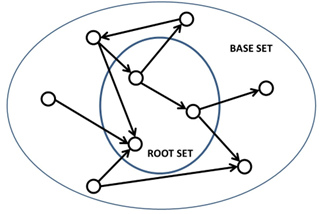

Image retrieved by [HITS Algorithm: Link Analysis Explanation and Python Implementation from Scratch](https://towardsdatascience.com/hits-algorithm-link-analysis-explanation-and-python-implementation-61f0762fd7cf)

#### **Step by step HITS algorithm**

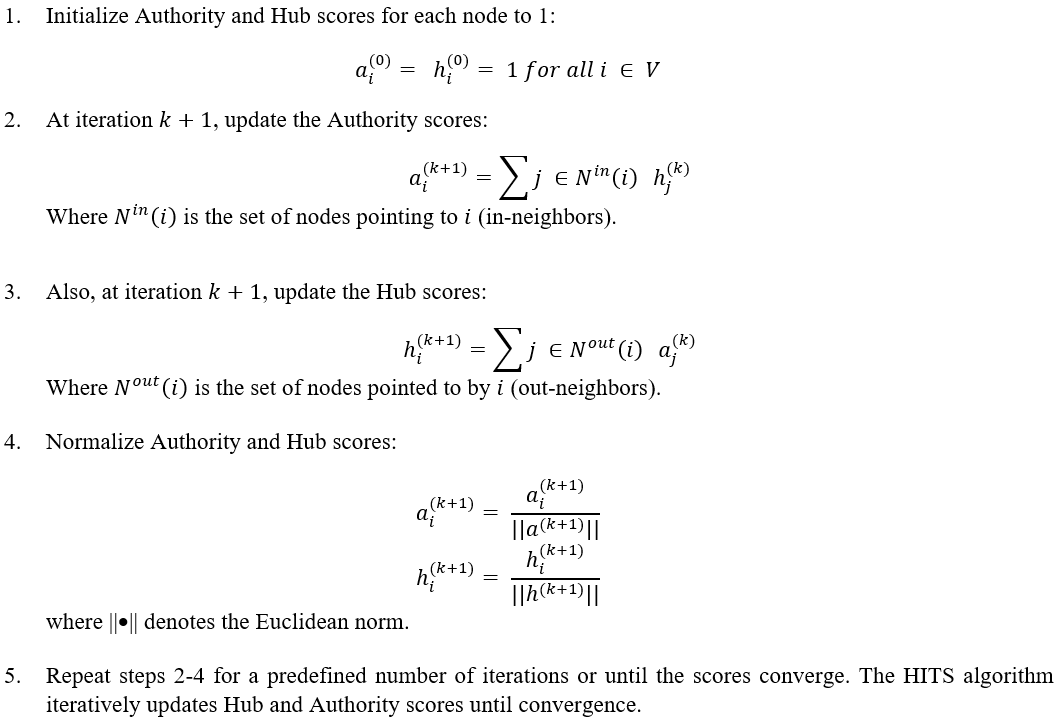



#### **Practical Example**

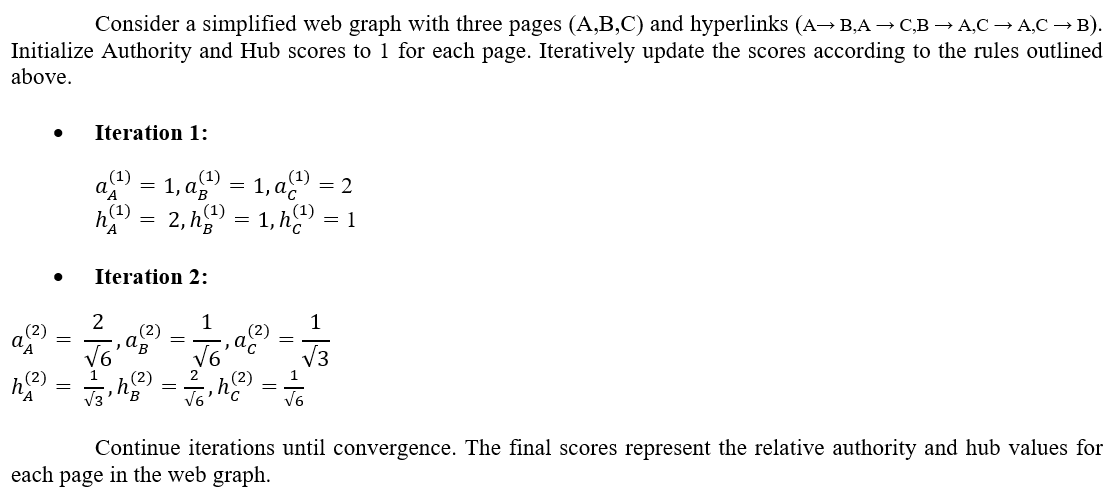

#### **HITS algorithm in Python environment**
This Python script employs the NetworkX library to implement the Hyperlink-Induced Topic Search (HITS) algorithm on a directed graph representing a hyperlink structure. The directed edges between nodes (web pages) illustrate the hyperlink relationships. The script initializes a DiGraph object in NetworkX, adding edges based on the given relationships. Following the graph creation, the HITS algorithm is applied to calculate hub and authority scores for each node in the graph. The nx.hits function from NetworkX is utilized for this purpose, with a maximum of 100 iterations specified.

In [ ]:
#installing networkx library
%pip install networkx

In [2]:
import networkx as nx

# Create a directed graph representing the hyperlink structure
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 1), (3, 1), (3, 2)])

# Apply HITS algorithm
hub, authority = nx.hits(G, max_iter=100)

# Display Hub and Authority scores for each page
for node in G.nodes():
    print(f"Page {node}: Hub Score = {hub[node]}, Authority Score = {authority[node]}")


Page 1: Hub Score = 0.35689586789220934, Authority Score = 0.3568958678922096
Page 2: Hub Score = 0.19806226419516187, Authority Score = 0.44504186791262873
Page 3: Hub Score = 0.44504186791262884, Authority Score = 0.19806226419516168


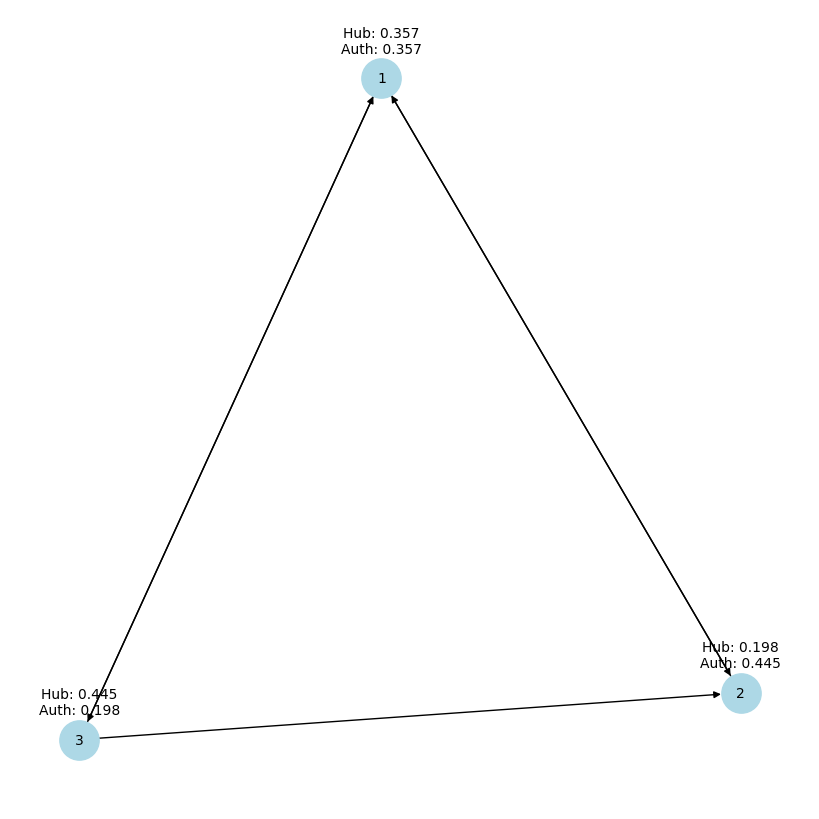

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph representing the hyperlink structure
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 1), (3, 1), (3, 2)])

# Apply HITS algorithm
hub, authority = nx.hits(G, max_iter=100)

# Create a plot
plt.figure(figsize=(8, 8))

# Draw the graph with node labels as Hub and Authority scores
pos = nx.spring_layout(G)  # You can use different layout algorithms
nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, font_color='black')

# Annotate nodes with Hub and Authority scores
for node in G.nodes():
    plt.text(pos[node][0], pos[node][1] + 0.05, f"Hub: {hub[node]:.3f}\nAuth: {authority[node]:.3f}", ha='center')

# Show the plot
plt.show()

#### **Results** 
posted are the output of the Hyperlink-Induced Topic Search (HITS) algorithm. 
Each web page is assigned two scores **Hubs** and **Authorities**:


| Page | Hub Score                 | Authority Score            |
|------|---------------------------|----------------------------|
| 1    | 0.35689586789220956       | 0.35689586789220934       |
| 2    | 0.19806226419516168       | 0.44504186791262895       |
| 3    | 0.4450418679126288        | 0.1980622641951618        |


Here's an explanation of the scores for each page:

##### Page 1:
- The Hub score for Page 1 is **0.3569**, meaning it is considered a **Good hub**, linking to other important pages. 
- The Authority score of **0.3569** suggests that Page 1 is also linked from other authoritative pages.

##### Page 2:
- The **Hub score** for Page 2 is **0.1981**, indicating that it is **not as significant** as a hub compared to Page 1. 
- However, it has a **high Authority score of 0.4450**, meaning it is linked from other important pages.

##### Page 3:
- Page 3 has a **high Hub score of 0.4450**, suggesting it is a **significant hub**, linking to other important pages. 
- On the other hand, its **Authority score is 0.1981**, less authoritative pages compared to Page 1

#### **More extended Example (14 nodes)**
This code employs **HITS algorithm** to analyze the importance of web pages within a complex directed graph (14 nodes in total) representing hyperlink structures. By applying NetworkX, the script calculates Hub and Authority scores for each page and identifies the most and least hub, as well as the most and least authority nodes. 

The results are then visually conveyed using matplotlib, where nodes are color-coded based on their roles. This approach offers a concise yet insightful representation of the hierarchical significance of web pages within the interconnected network, showcasing the efficacy of HITS for web structure analysis and visualization.

Page 1: Hub Score = 0.1068, Authority Score = 0.3065
Page 2: Hub Score = 0.1038, Authority Score = 0.1652
Page 3: Hub Score = 0.1226, Authority Score = 0.2154
Page 4: Hub Score = 0.0904, Authority Score = 0.2359
Page 5: Hub Score = 0.0286, Authority Score = 0.0771
Page 6: Hub Score = 0.0904, Authority Score = 0.0000
Page 7: Hub Score = 0.0695, Authority Score = -0.0000
Page 8: Hub Score = 0.0134, Authority Score = -0.0000
Page 9: Hub Score = 0.0940, Authority Score = -0.0000
Page 10: Hub Score = 0.0420, Authority Score = -0.0000
Page 11: Hub Score = 0.0904, Authority Score = -0.0000
Page 12: Hub Score = 0.0409, Authority Score = -0.0000
Page 13: Hub Score = 0.0134, Authority Score = -0.0000
Page 14: Hub Score = 0.0940, Authority Score = -0.0000


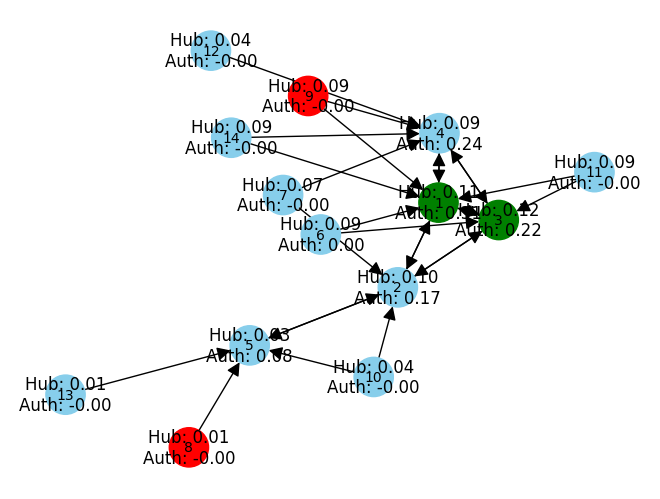

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph representing the hyperlink structure
G = nx.DiGraph()

# Add nodes and edges to represent a more complex web structure
web_structure = [
    (1, 2), (1, 3), (1, 4),
    (2, 1), (2, 3), (2, 5),
    (3, 1), (3, 2), (3, 4),
    (4, 1), (4, 3),
    (5, 2),
    (6, 1), (6, 3),
    (7, 2), (7, 4),
    (8, 5),
    (9, 1), (9, 4),
    (10, 2), (10, 5),
    (11, 1), (11, 3),
    (12, 4),
    (13, 5),
    (14, 1), (14, 4)
]

G.add_edges_from(web_structure)

# Apply HITS algorithm
hub, authority = nx.hits(G, max_iter=100)

# Find the most and least hub nodes
most_hub_node = max(hub, key=hub.get)
least_hub_node = min(hub, key=hub.get)

# Find the most and least authority nodes
most_authority_node = max(authority, key=authority.get)
least_authority_node = min(authority, key=authority.get)

# Display Hub and Authority scores for each page
for node in G.nodes():
    print(f"Page {node}: Hub Score = {hub[node]:.4f}, Authority Score = {authority[node]:.4f}")

# Draw the graph for visualization
pos = nx.spring_layout(G)

# Highlight the most and least hub nodes in red and green, respectively
# Highlight the most and least authority nodes in red and green, respectively
node_colors = [
    'green' if node == most_hub_node or node == most_authority_node
    else 'red' if node == least_hub_node or node == least_authority_node
    else 'skyblue' for node in G.nodes
]

nx.draw(G, pos, with_labels=True, node_size=800, node_color=node_colors, font_size=10, font_color='black', arrowsize=20)
labels = {node: f"Hub: {hub[node]:.2f}\nAuth: {authority[node]:.2f}" for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=labels)

# Show the plot
plt.show()


#### **When to use the HITS Algorithm**
- Directed Graph Structures: HITS excels in scenarios where the data is structured as a directed graph, making it particularly valuable for applications involving hyperlink relationships.
- Web Structure Mining: The algorithm is highly effective for web structure mining, offering insights into the importance and influence of specific web pages based on hyperlink relationships.
- Identification of Authorities and Hubs: HITS is well-suited for situations where identifying authoritative sources and hubs within a network is crucial, providing a nuanced understanding of the significance of specific web pages.

- Hierarchical Data Structures: In domains where the data exhibits a clear hierarchical structure, HITS proves to be a powerful tool for uncovering authoritative sources within a linked environment.

#### **Where NOT to use it**
- Lack of Graph Structure: HITS may not be optimal for datasets lacking a discernible graph structure or meaningful hyperlink relationships.
- Loosely Connected Entities: In cases where the dataset comprises unconnected or loosely connected entities without clear directional links, the effectiveness of HITS diminishes.
- Undefined Entity Importance: If the relationships between entities do not inherently indicate authority or hub status, HITS may not provide meaningful insights.
- Non-Hyperlink Data Types: HITS might not be the best choice for datasets where the data types do not involve hyperlink structures; alternative algorithms may offer more accurate results.

#### **SUMMARY**
The HITS algorithm identifies the importance of web pages in terms of their role as hubs (pages that link to other important pages) and authorities (pages that are linked to other important hubs). Pages with high Hub scores are good at linking to other pages, and pages with high Authority scores are linked from other significant hubs. The interpretation of these scores depends on the specific structure of the hyperlink network in the web data mining tested.

#### **REFERENCES**
Han, J., Kamber, M., & Pei, J. (2011). Data mining: concepts and techniques. Morgan Kaufmann.

Jiawei, H., Jian, P., & Micheline, K. (2012). Data Mining: Concepts and Techniques. Elsevier.

Kleinberg, J. (1999). Authoritative sources in a hyperlinked environment. Journal of the ACM, 46(5), 604-632. https://doi.org/10.1145/324133.324140

University of Michigan. (2022, January 15) HITS Algorithm and HUBS and AUTHORITIES Explained. YouTube. https://www.youtube.com/watch?v=-kiKUYM9Qq8

Wang, C., Li, Y., Wang, Y., & Zhang, X. (2021). Identifying Influential Nodes in Social Networks Based on Hyperlink-Induced Topic Search. IEEE Access, 9, 51118-51128. https://doi.org/10.1109/ACCESS.2021.3069919

Wu, X., Zhu, X., Wu, G. Q., & Ding, W. (2014). Data mining with big data. IEEE Transactions on Knowledge and Data Engineering, 26(1), 97-107. https://doi.org/10.1109/TKDE.2013.109
